## Тема “Обучение без учителя”

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
from sklearn.datasets import load_boston
boston = load_boston()
# boston.keys()

In [130]:
data = boston.data
data.shape

(506, 13)

In [131]:
feature_names = boston.feature_names

X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [132]:
target = boston.target

y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

#### Масштабирование данных

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

#### Модель TSNE

In [135]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne.shape

(404, 2)

#### Диаграмма рассеяния

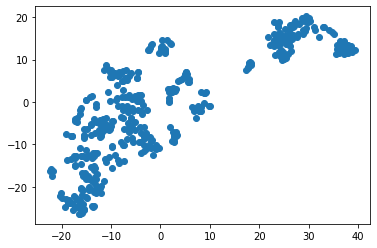

In [136]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [137]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [138]:
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

#### Диаграмма рассеяния (с кластерами)

Text(-8, -22, 'Кластер 2')

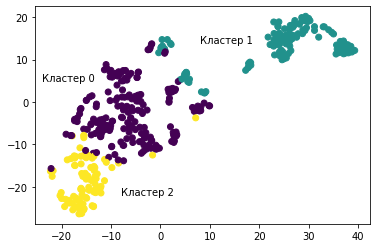

In [145]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.text(-24,  5, 'Кластер 0')
plt.text( 8,  14, 'Кластер 1')
plt.text(-8, -22, 'Кластер 2')

### Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [140]:
labels_test = kmeans.predict(X_test_scaled)

In [141]:
print('Среднее значение price:')
print(f'\tпо всей выборке = {float(y_test.mean()):.6}')
print(f'\tпо Кластеру 0   = {float(y_test[labels_test == 0].mean()):.6}')
print(f'\tпо Кластеру 1   = {float(y_test[labels_test == 1].mean()):.6}')
print(f'\tпо Кластеру 2   = {float(y_test[labels_test == 2].mean()):.6}')

Среднее значение price:
	по всей выборке = 21.4882
	по Кластеру 0   = 21.8608
	по Кластеру 1   = 16.4371
	по Кластеру 2   = 31.35


In [143]:
print('Среднее значение CRIM:')
print(f'\tпо всей выборке = {float(X_test["CRIM"].mean()):.6}')
print(f'\tпо Кластеру 0   = {float(X_test.loc[labels_test == 0, "CRIM"].mean()):.6}')
print(f'\tпо Кластеру 1   = {float(X_test.loc[labels_test == 1, "CRIM"].mean()):.6}')
print(f'\tпо Кластеру 2   = {float(X_test.loc[labels_test == 2, "CRIM"].mean()):.6}')


Среднее значение CRIM:
	по всей выборке = 3.63095
	по Кластеру 0   = 0.266079
	по Кластеру 1   = 10.1655
	по Кластеру 2   = 0.06206
